# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [370]:
from random import random, seed
import math
from itertools import accumulate
import numpy as np
import matplotlib.pyplot as plt



from icecream import ic

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [414]:
UNIVERSE_SIZE = 1000
NUM_SETS = 100
DENSITY = 0.2 #how dense are the sets, how many elements are covered by each set


rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [415]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [373]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()


## CHOSEN SOLUTION

## Fitness
The fitness defines the goodness of a solution. I decided to return a tuple containing (coverage,-cost).
The coverage represents the number of elements in the universe that are covered, while the cost is defined as above.

In [374]:
#The fitness function evaluate the goodness of a solution
def fitness(solution: np.ndarray):
    """Returns a tuple containing first the number of elements covered by the solution and then the cost of the solution (negative->to be maximized)"""
    return (np.sum(np.logical_or.reduce(SETS[solution])), -cost(solution))

## GREEDY INITIALIZATION

In [375]:
def greedy_cover_selection():
    """Greedy approach to generate an initial solution for the Set Cover problem."""
    covered_elements = np.zeros(SETS.shape[1], dtype=bool)
    selected_sets = np.zeros(len(SETS), dtype=bool)
    
    while not np.all(covered_elements):
        optimal_set = -1
        optimal_cost_ratio = float('inf')
        
        for idx in range(len(SETS)):
            if selected_sets[idx]:  # Skip already selected sets
                continue
            uncovered_elements = np.logical_and(SETS[idx], np.logical_not(covered_elements)).sum()
            if uncovered_elements > 0:
                cost_efficiency = COSTS[idx] / uncovered_elements
                if cost_efficiency < optimal_cost_ratio:
                    optimal_cost_ratio = cost_efficiency
                    optimal_set = idx
        
        selected_sets[optimal_set] = True
        covered_elements = np.logical_or(covered_elements, SETS[optimal_set])
        
    return selected_sets


In [376]:
history = []
starting_solution = greedy_cover_selection()
solution_fitness = fitness(starting_solution)
ic(solution_fitness) #starting point
history.append(solution_fitness[1])

ic| solution_fitness: (np.int64(100000), np.float64(-1526456.203506691))


## TWEAK FUNCTION

In [377]:
def multiple_mutation_strength(solution: np.ndarray, strength: float)->np.ndarray:  
    new_solution = solution.copy()
    mask = rng.random(NUM_SETS) < strength
    new_solution = np.logical_xor(solution,mask)
    return new_solution

## PARAMETER TUNING
The algorithm should adapt to changes to instances of the problem
If we use a modified version of iterated local search, we have basically to adapt 2 main parameters:
- Strength (approximately the percentage of elements tweaked with respect to the current solution)
- Number of iterations (function of the problem size: it should increase with it, but it depends on the time required to execute the algorithm)
  
The strength depends on the density: if the density is high, the solution is less sensitive to small changes.

In [416]:
BASE_ITERATIONS = 20
number_iteration = int(BASE_ITERATIONS*math.log(UNIVERSE_SIZE))/2
number_iteration_exploration = int(number_iteration*0.2)
number_iteration_exploitation = int(number_iteration - number_iteration_exploration)
ic(number_iteration, number_iteration_exploration, number_iteration_exploitation)

#At the beginning I should favor exploration, then I should favor exploitation
#The strength depends on the density: if the density is high, the solution is less sensitive to small changes
BASE_STRENGTH = (0.01/UNIVERSE_SIZE)
strength = BASE_STRENGTH * (1+DENSITY)
ic(strength)


ic| number_iteration

: 69.0
    number_iteration_exploration: 13
    number_iteration_exploitation: 56
ic| strength: 1.2e-05


1.2e-05

In [417]:

best = np.full(NUM_SETS,False) #Completely empty solution
count_iteration = 0
solution_fitness = fitness(best)
ic(solution_fitness)
for steps_perturbation in range(int(number_iteration_exploration)):
    if(solution_fitness[0]<UNIVERSE_SIZE/1.5):
        strength*=(1+(1-DENSITY)*5)
    else:
        if(strength>1*DENSITY):
            strength*=(1-DENSITY*5)
    
    solution_perturbated = multiple_mutation_strength(best,strength*4) #a huge mutation->exploration
    for steps_local in range(number_iteration_exploitation):
        count_iteration+=1
        new_solution = multiple_mutation_strength(solution_perturbated,strength)
        fitness_new = fitness(new_solution)
        ic(fitness_new)
        if fitness_new > solution_fitness:
            solution_fitness = fitness_new
            solution_perturbated = new_solution
            best = new_solution.copy()
ic(count_iteration)
ic(fitness(best))
ic(valid(best))

ic|

 solution_fitness: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (np.int64(0), np.float64(-0.0))
ic| fitness_new: (

np.True_

In [380]:
best = starting_solution.copy()
solution_fitness = fitness(best)
ic(solution_fitness)
for steps_perturbation in range(int(number_iteration_exploration)):
    solution_perturbated = multiple_mutation_strength(best,strength/50) #a huge mutation->exploration
    for steps_local in range(number_iteration_exploitation):
        new_solution = multiple_mutation_strength(solution_perturbated,strength/100)
        fitness_new = fitness(new_solution)
        if fitness_new > solution_fitness:
            solution_fitness = fitness_new
            solution_perturbated = new_solution
            best = new_solution.copy()

ic(fitness(best))
ic(valid(best))

ic| solution_fitness: (np.int64(100000), np.float64(-1526456.203506691))
ic| fitness(best): (np.int64(100000), np.float64(-1526456.203506691))
ic| valid(best): np.True_


np.True_

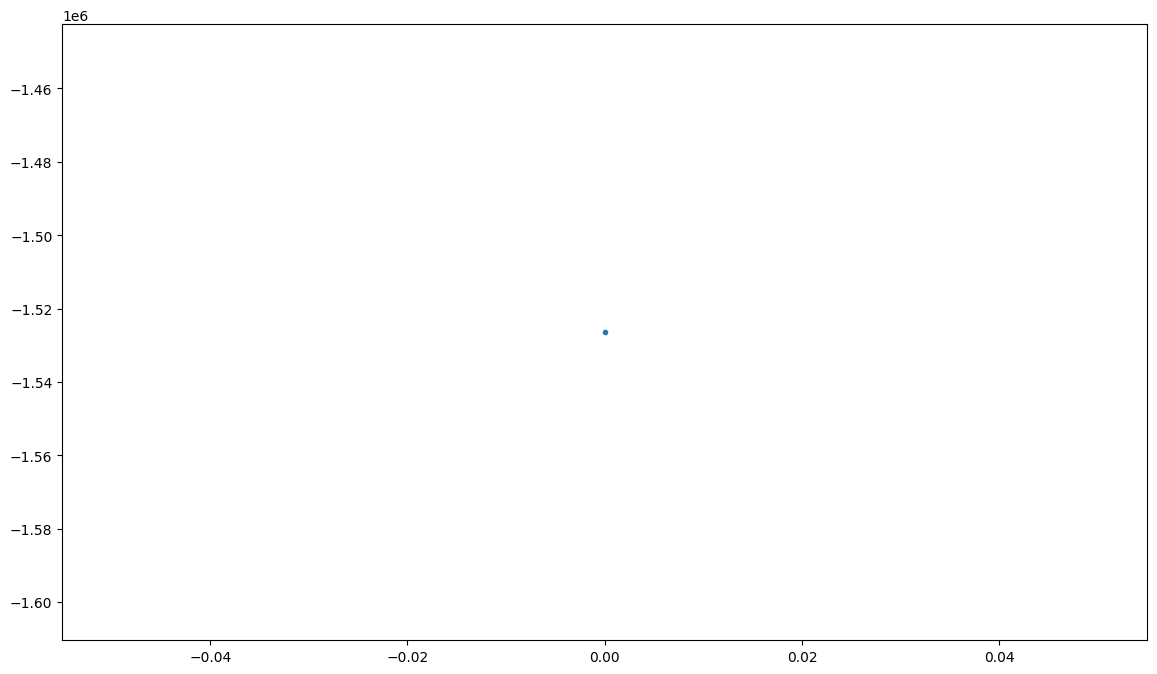

In [381]:
#plot
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
plt.scatter(range(len(history)), history, marker=".")

plt.show()


In [382]:
new_sol = rng.random(NUM_SETS) < 0.2
ic(fitness(new_sol))
(best,best_eval,history) = simulated_annealing(fitness, new_sol, 100, temperature, strength,history)
ic(fitness(best))

ic| fitness(new_sol): (np.int64(100000), np.float64(-51165234.78258349))
ic| fitness(best): (np.int64(100000), np.float64(-51016554.33391198))


(np.int64(100000), np.float64(-51016554.33391198))